## web scarping

In [3]:
!pip install requests

In [6]:
!pip install beautifulsoup4

In [78]:
!pip install html5lib

In [205]:
#importing required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn import preprocessing

In [80]:
#sending request to the server
url='https://finance.yahoo.com/u/yahoo-finance/watchlists/the-berkshire-hathaway-portfolio?.tsrc=fin-srch'
#assigning the requested value into a variable
page=requests.get(url)
#displying the variable's text,now we have the html data of the page
# page.text

In [81]:
#now we will separate the data we need
soup=BeautifulSoup(page.text,'html.parser')
# soup.text#got only the details of page content excluding html

In [231]:
#extracting the header data
for i in soup.select('th'):
    print(i.text)


Watchlist
Change Today
1 Month Return
1 Year Return
Total Return
Symbol
Company Name
Last Price
Change
% Change
Market Time
Volume
Avg Vol (3 month)
Market Cap


In [232]:
#separating the data rows
table = soup.find('table', attrs={'class':'cwl-symbols W(100%)'})
table_rows = table.find_all('tr')

for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    print(row) 


[]
['AAPL', 'Apple Inc.', '117.8011', '+0.29', '+0.25%', '11:56 AM EDT', '36.44M', '174.07M', '2,014.69B']
['BAC', 'Bank of America Corporation', '24.175', '+0.03', '+0.14%', '11:56 AM EDT', '17.62M', '58.50M', '209.39B']
['CHTR', 'Charter Communications, Inc.', '607.65', '-0.61', '-0.10%', '11:55 AM EDT', '185.50k', '918.68k', '124.51B']
['MDLZ', 'Mondelez International, Inc.', '56.855', '-0.13', '-0.22%', '11:56 AM EDT', '1.47M', '5.89M', '81.21B']
['USB', 'U.S. Bancorp', '39.1383', '-0.07', '-0.18%', '11:56 AM EDT', '1.55M', '6.28M', '58.96B']
['KHC', 'The Kraft Heinz Company', '31.6582', '-0.33', '-1.04%', '11:56 AM EDT', '917.53k', '6.03M', '38.70B']
['BK', 'The Bank of New York Mellon Corporation', '37.24', '+0.14', '+0.38%', '11:56 AM EDT', '1.65M', '4.85M', '33.00B']
['DAL', 'Delta Air Lines, Inc.', '31.71', '-0.27', '-0.84%', '11:56 AM EDT', '5.06M', '20.41M', '20.22B']
['STNE', 'StoneCo Ltd.', '60.17', '+0.97', '+1.64%', '11:56 AM EDT', '724.60k', '2.55M', '18.58B']
['LSXMK',

In [233]:
#creating a dataframe and putting them into a dataframe
l = []
for tr in table_rows:
   
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
stock=pd.DataFrame(l, columns=['Symbol','Company Name','Last Price','Change','% Change','Market Time','Volume','Avg Vol (3 month)','Market cap'])

In [234]:
stock.head()#finally prepared out dataframes

,Symbol,Company Name,Last Price,Change,% Change,Market Time,Volume,Avg Vol (3 month),Market cap
0,None,None,None,None,None,None,None,None,None
1,AAPL,Apple Inc.,117.8011,+0.29,+0.25%,11:56 AM EDT,36.44M,174.07M,"2,014.69B"
2,BAC,Bank of America Corporation,24.175,+0.03,+0.14%,11:56 AM EDT,17.62M,58.50M,209.39B
3,CHTR,"Charter Communications, Inc.",607.65,-0.61,-0.10%,11:55 AM EDT,185.50k,918.68k,124.51B
4,MDLZ,"Mondelez International, Inc.",56.855,-0.13,-0.22%,11:56 AM EDT,1.47M,5.89M,81.21B


In [235]:
stock.describe()

,Symbol,Company Name,Last Price,Change,% Change,Market Time,Volume,Avg Vol (3 month),Market cap
count,16,16,16,16,16,16,16,16,16
unique,16,15,16,16,16,4,16,16,16
top,MTB,Liberty Latin America Ltd.,35.63,+0.03,+0.14%,11:56 AM EDT,98.17k,20.41M,20.22B
freq,1,2,1,1,1,13,1,1,1


In [236]:
stock.isna().sum()

Symbol               1
Company Name         1
Last Price           1
Change               1
% Change             1
Market Time          1
Volume               1
Avg Vol (3 month)    1
Market cap           1
dtype: int64

In [237]:
stock.dropna(inplace=True)

In [238]:
stock.isna().sum()

Symbol               0
Company Name         0
Last Price           0
Change               0
% Change             0
Market Time          0
Volume               0
Avg Vol (3 month)    0
Market cap           0
dtype: int64

In [239]:
stock.head()

,Symbol,Company Name,Last Price,Change,% Change,Market Time,Volume,Avg Vol (3 month),Market cap
1,AAPL,Apple Inc.,117.8011,+0.29,+0.25%,11:56 AM EDT,36.44M,174.07M,"2,014.69B"
2,BAC,Bank of America Corporation,24.175,+0.03,+0.14%,11:56 AM EDT,17.62M,58.50M,209.39B
3,CHTR,"Charter Communications, Inc.",607.65,-0.61,-0.10%,11:55 AM EDT,185.50k,918.68k,124.51B
4,MDLZ,"Mondelez International, Inc.",56.855,-0.13,-0.22%,11:56 AM EDT,1.47M,5.89M,81.21B
5,USB,U.S. Bancorp,39.1383,-0.07,-0.18%,11:56 AM EDT,1.55M,6.28M,58.96B


In [240]:
stock['Symbol'].unique()

array(['AAPL', 'BAC', 'CHTR', 'MDLZ', 'USB', 'KHC', 'BK', 'DAL', 'STNE',
       'LSXMK', 'MTB', 'LBTYA', 'DVA', 'GL', 'LILA', 'LILAK'],
      dtype=object)

In [241]:
x=stock.drop('Company Name',axis=1)
x.head()

,Symbol,Last Price,Change,% Change,Market Time,Volume,Avg Vol (3 month),Market cap
1,AAPL,117.8011,+0.29,+0.25%,11:56 AM EDT,36.44M,174.07M,"2,014.69B"
2,BAC,24.175,+0.03,+0.14%,11:56 AM EDT,17.62M,58.50M,209.39B
3,CHTR,607.65,-0.61,-0.10%,11:55 AM EDT,185.50k,918.68k,124.51B
4,MDLZ,56.855,-0.13,-0.22%,11:56 AM EDT,1.47M,5.89M,81.21B
5,USB,39.1383,-0.07,-0.18%,11:56 AM EDT,1.55M,6.28M,58.96B


In [242]:
label_encoder=preprocessing.LabelEncoder()
x['Symbol']=label_encoder.fit_transform(x['Symbol'])
x['Symbol'].unique()

array([ 0,  1,  3, 12, 15,  7,  2,  4, 14, 11, 13,  8,  5,  6,  9, 10])

No handles with labels found to put in legend.


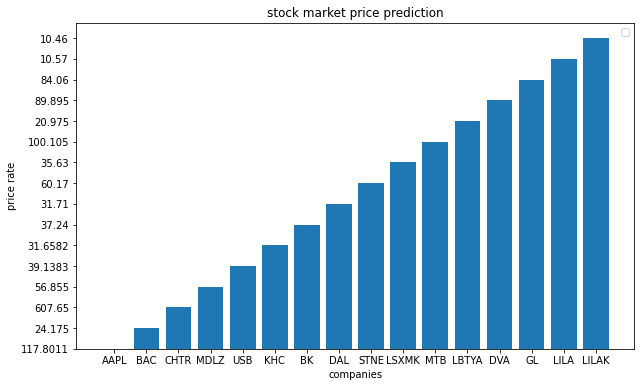

In [260]:
plt.subplots(figsize=(10,6))
plt.bar(stock["Symbol"],stock['Last Price']);
plt.title("stock market price prediction")
plt.xlabel("companies")
plt.ylabel("price rate")
plt.legend();

<AxesSubplot:>

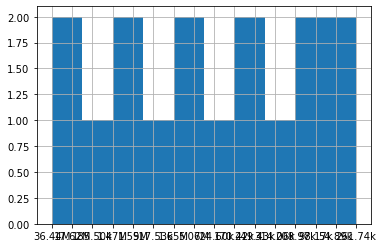

In [264]:
stock["Volume"].hist()

<AxesSubplot:>

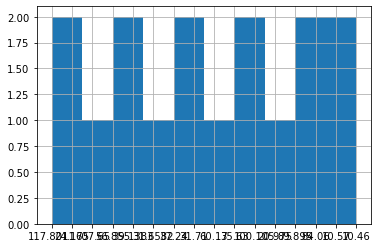

In [272]:
stock['Last Price'].hist()